### Machine Learning Model Evaluation

We evaluates the performance of machine learning models used for sentiment classification.
We compare multiple algorithms including Logistic Regression, Naive Bayes, Support Vector Machine, Random Forest, XGBoost and TextBlob.

##### Import required Libaries

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from joblib import load
from sklearn.feature_extraction.text import TfidfVectorizer
import joblib

##### Loaded Dataset

In [10]:
# Load your final dataset with sentiment & cleaned reviews
final_df = pd.read_csv('data/merged_with_sentiment_and_polarity.csv')
final_df.head()
# Check columns
print(final_df.columns)

Index(['rating', 'title', 'text', 'asin', 'parent_asin', 'user_id',
       'helpful_vote', 'verified_purchase', 'cleaned_text', 'main_category',
       'product_title', 'average_rating', 'rating_number', 'price', 'store',
       'details', 'sentiment', 'polarity'],
      dtype='object')


#### Sentiment Classification

In this step, the cleaned_text column provides the input features (text reviews), and the sentiment column serves as the target labels (positive, negative, neutral) for supervised machine learning algorithms. The text is first converted to numerical vectors using TF-IDF, allowing the classifier to learn the relationship between the textual content and its sentiment category.

In [11]:
# Use cleaned_text and TextBlob sentiment label for now
X = final_df['cleaned_text']
y = final_df['sentiment']   # Must be 'positive', 'negative', 'neutral'

##### Term Frequency–Inverse Document Frequency Method

The cleaned review text was vectorized using the TF-IDF (Term Frequency–Inverse Document Frequency) method, which transforms textual data into a weighted numeric representation. This ensures that the sentiment classification models can process the data numerically and learn word importance for predicting sentiment labels

ML models can’t read raw text — we must convert text → numeric vectors.
TF-IDF is standard for short reviews.

In [12]:
tfidf = TfidfVectorizer()
X_tfidf = tfidf.fit_transform(X)

print(X_tfidf.shape)  # (rows, features)


(483333, 151164)


We need to split test and train data. The TF-IDF vectorized data was split into training and testing sets using an 80–20 ratio. The training set was used to fit the machine learning classifiers, while the test set was used to evaluate their performance on unseen reviews to ensure model generalizability.

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape)

print(y_test.value_counts())

(386666, 151164) (96667, 151164)
sentiment
positive    62615
neutral     25724
negative     8328
Name: count, dtype: int64


#### Sentiment Analysis: Machine Learning Model Evaluation

Supervised machine learning is used in this project because the sentiment labels for each review are known beforehand. This allows us to train classification models that can learn the relationship between the review text and its sentiment category. These models can then be used to predict sentiment for new, unseen reviews and support product recommendation and insight generation.

This project goal is to analyze product reviews and classify their sentiment (positive, neutral, or negative), then use this for recommendation and sales insight.

##### Model 1: Logistic Regression

Logistic Regression is a linear model commonly used for classification problems. It works well with linearly separable data and is efficient for text classification when features are high-dimensional (like with TF-IDF).

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix,f1_score

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

lr_pred = lr.predict(X_test)

print("Logistic Regression Report")
print(classification_report(y_test, lr_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, lr_pred))
print("Accuracy:", accuracy_score(y_test, lr_pred))

Logistic Regression Report
              precision    recall  f1-score   support

    negative       0.82      0.57      0.68      8328
     neutral       0.79      0.85      0.82     25724
    positive       0.95      0.95      0.95     62615

    accuracy                           0.89     96667
   macro avg       0.85      0.79      0.82     96667
weighted avg       0.89      0.89      0.89     96667

Confusion Matrix:
 [[ 4781  3162   385]
 [  851 21975  2898]
 [  193  2683 59739]]
Accuracy: 0.8947727766455977


##### Model 2: Naive Bayes

Naive Bayes is a probabilistic classifier based on Bayes’ Theorem. It assumes feature independence and works particularly well with text data and word frequencies like those from TF-IDF.

In [15]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(X_train, y_train)
nb_pred = nb.predict(X_test)

print("Naive Bayes Report")
print(classification_report(y_test, nb_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, nb_pred))
print("Accuracy:", accuracy_score(y_test, nb_pred))

Naive Bayes Report
              precision    recall  f1-score   support

    negative       0.98      0.03      0.05      8328
     neutral       0.61      0.08      0.14     25724
    positive       0.67      1.00      0.80     62615

    accuracy                           0.67     96667
   macro avg       0.76      0.37      0.33     96667
weighted avg       0.68      0.67      0.56     96667

Confusion Matrix:
 [[  214  1110  7004]
 [    2  2035 23687]
 [    2   165 62448]]
Accuracy: 0.6692770024930949


##### Model 3: Support Vector Machine

SVM finds the optimal hyperplane that best separates data into classes. It is powerful for high-dimensional data like text and usually provides strong performance.

In [16]:
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,f1_score

# Train SVM
svm = LinearSVC()
svm.fit(X_train, y_train)

# Predict
svm_pred = svm.predict(X_test)

# Evaluate
print("SVM Results:\n", classification_report(y_test, svm_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, svm_pred))
print("Accuracy:", accuracy_score(y_test, svm_pred))

SVM Results:
               precision    recall  f1-score   support

    negative       0.74      0.57      0.65      8328
     neutral       0.78      0.79      0.78     25724
    positive       0.93      0.95      0.94     62615

    accuracy                           0.88     96667
   macro avg       0.82      0.77      0.79     96667
weighted avg       0.87      0.88      0.87     96667

Confusion Matrix:
 [[ 4771  3137   420]
 [ 1464 20269  3991]
 [  221  2647 59747]]
Accuracy: 0.8771038720556136


##### Save Trained Models

In [17]:
joblib.dump(lr, 'models/sentiment_logreg.pkl')
joblib.dump(nb, 'models/sentiment_naivebayes.pkl')
joblib.dump(svm, 'models/sentiment_svm.pkl')


['models/sentiment_svm.pkl']

#### Comapring Model Evaluation (Accuracy & F1 Score)

This will show the best performance modle.

Accuracy: the proportion of correctly predicted instances.

F1 Score: the harmonic mean of precision and recall, especially useful for imbalanced datasets.

In [18]:
sentiment_results = {
    'Model': ['Logistic Regression', 'Naive Bayes', 'SVM'],
    'Accuracy': [
        accuracy_score(y_test, lr_pred),
        accuracy_score(y_test, nb_pred),
        accuracy_score(y_test, svm_pred)
    
        
    ],
    'F1 Score': [
        f1_score(y_test, lr_pred, average='weighted'),
        f1_score(y_test, nb_pred, average='weighted'),
        f1_score(y_test, svm_pred, average='weighted')
    
    ]
}

# Create and display DataFrame
df_results = pd.DataFrame(sentiment_results)
print(df_results)  # 👈 This will display the accuracy table

# Save to CSV
df_results.to_csv('models/performance wiht accuracy.csv', index=False)

                 Model  Accuracy  F1 Score
0  Logistic Regression  0.894773  0.892619
1          Naive Bayes  0.669277  0.561027
2                  SVM  0.877104  0.874498


##### Model Performance Visualization (Accuracy & F1 Score)

This bar plot displays the accuracy score of each tuned model. Accuracy indicates the percentage of correct predictions made by the model on the test dataset. The F1 Score considers both precision and recall, making it useful for imbalanced datasets. This plot allows us to visually assess how well each model balances false positives and false negatives.

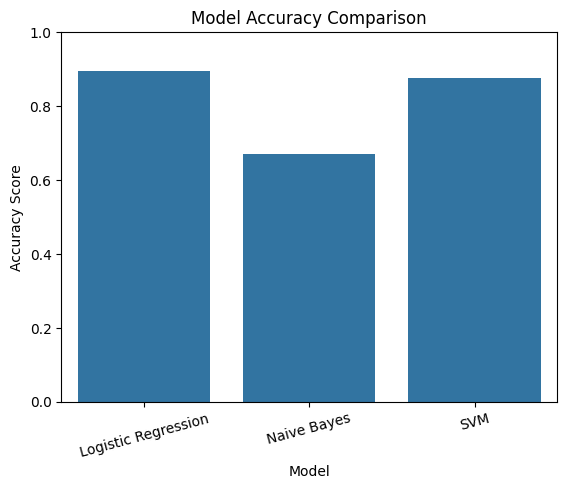

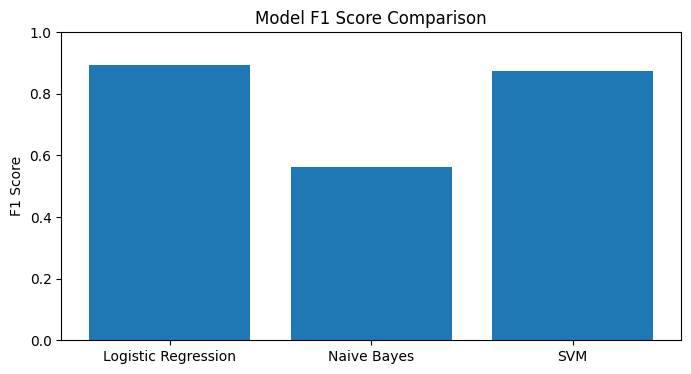

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Accuracy Performance
sns.barplot(data=df_results, x='Model', y='Accuracy')
plt.ylim(0, 1)
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy Score")
plt.xticks(rotation=15)
plt.show()

# F1 Score performance
plt.figure(figsize=(8, 4))
plt.bar(df_results['Model'], df_results['F1 Score'])
plt.title("Model F1 Score Comparison")
plt.ylabel("F1 Score")
plt.ylim(0, 1)
plt.show()

#### Hyperparameter Tuning with GridSearchCV

Hyperparameter tuning helps improve model performance by finding the best combination of parameters. GridSearchCV performs an exhaustive search over specified parameter values using cross-validation to evaluate model performance. GridSearchCV tests multiple combinations of hyperparameters using cross-validation, and selects the best-performing model configuration.

Hyperparameter tuning allows the model to learn the best internal settings to achieve the highest possible accuracy on unseen reviews. Without tuning, the model may underperform or overfit

##### Logistic Regression Tuning

In this step, we perform hyperparameter tuning using GridSearchCV to find the best combination of parameters for the LogisticRegression model. This helps improve model accuracy and generalization by selecting the best combination of penalty, regularization strength, and solver.

In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report


# Define parameter grid
lr_params = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['liblinear', 'lbfgs']
}

# Setup GridSearch
lr_grid = GridSearchCV(LogisticRegression(max_iter=1000), lr_params, cv=5, scoring='accuracy', n_jobs=-1)
lr_grid.fit(X_train, y_train)

# Best model
best_lr = lr_grid.best_estimator_
print("Best Logistic Regression Parameters:", lr_grid.best_params_)


# Predict with best Logistic Regression model
lr_pred = best_lr.predict(X_test)

# Evaluate
print("\n--- Tuned Logistic Regression Evaluation ---")
print("Accuracy:", accuracy_score(y_test, lr_pred))
print("F1 Score:", f1_score(y_test, lr_pred, average='weighted'))
print("\nClassification Report:\n", classification_report(y_test, lr_pred))


Best Logistic Regression Parameters: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}

--- Tuned Logistic Regression Evaluation ---
Accuracy: 0.9015279257657732
F1 Score: 0.9008471719428678

Classification Report:
               precision    recall  f1-score   support

    negative       0.81      0.66      0.73      8328
     neutral       0.81      0.86      0.83     25724
    positive       0.95      0.95      0.95     62615

    accuracy                           0.90     96667
   macro avg       0.86      0.82      0.84     96667
weighted avg       0.90      0.90      0.90     96667



##### Naive Bayes Tuning (MultinomialNB)

We apply GridSearchCV to tune the Multinomial Naive Bayes classifier. The tuning focuses on the smoothing parameter (alpha) and whether to learn class prior probabilities.

In [21]:
from sklearn.naive_bayes import MultinomialNB

# Parameter grid
nb_params = {
    'alpha': [0.1, 0.5, 1.0]
}

nb_grid = GridSearchCV(MultinomialNB(), nb_params, cv=5, scoring='accuracy', n_jobs=-1)
nb_grid.fit(X_train, y_train)

best_nb = nb_grid.best_estimator_
print("Best Naive Bayes Parameters:", nb_grid.best_params_)

# Predict with best model
nb_pred = best_nb.predict(X_test)

# Evaluate
print("\n--- Tuned Naive Bayes Evaluation ---")
print("Accuracy:", accuracy_score(y_test, nb_pred))
print("F1 Score:", f1_score(y_test, nb_pred, average='weighted'))
print("\nClassification Report:\n", classification_report(y_test, nb_pred))


Best Naive Bayes Parameters: {'alpha': 0.1}

--- Tuned Naive Bayes Evaluation ---
Accuracy: 0.7027320595446223
F1 Score: 0.6415546863102493

Classification Report:
               precision    recall  f1-score   support

    negative       0.77      0.14      0.23      8328
     neutral       0.58      0.23      0.33     25724
    positive       0.72      0.97      0.82     62615

    accuracy                           0.70     96667
   macro avg       0.69      0.45      0.46     96667
weighted avg       0.69      0.70      0.64     96667



##### Support Vector Machine Tuning (LinearSVC)

We use GridSearchCV to tune the Linear Support Vector Classifier (LinearSVC). The parameters explored include the regularization parameter (C) and the loss function type.

In [22]:
from sklearn.svm import LinearSVC

# Parameter grid
svm_params = {
    'C': [0.01, 0.1, 1, 10]
}

svm_grid = GridSearchCV(LinearSVC(), svm_params, cv=5, scoring='accuracy', n_jobs=-1)
svm_grid.fit(X_train, y_train)

best_svm = svm_grid.best_estimator_
print("Best SVM Parameters:", svm_grid.best_params_)
# Predict and evaluate
svm_pred = best_svm.predict(X_test)

print("\n--- Tuned SVM Evaluation ---")
print("Accuracy:", accuracy_score(y_test, svm_pred))
print("F1 Score:", f1_score(y_test, svm_pred, average='weighted'))
print("\nClassification Report:\n", classification_report(y_test, svm_pred))


Best SVM Parameters: {'C': 1}

--- Tuned SVM Evaluation ---
Accuracy: 0.8771038720556136
F1 Score: 0.8744982783496

Classification Report:
               precision    recall  f1-score   support

    negative       0.74      0.57      0.65      8328
     neutral       0.78      0.79      0.78     25724
    positive       0.93      0.95      0.94     62615

    accuracy                           0.88     96667
   macro avg       0.82      0.77      0.79     96667
weighted avg       0.87      0.88      0.87     96667



##### Tuned Models Evaluation (Accuracy & F1 Score)

After tuning our models using GridSearchCV, we now evaluate their performance on the unseen test dataset. This allows us to verify whether hyperparameter tuning has improved model accuracy and generalization.

We use accuracy_score and F1 score to assess the overall correctness of each model’s predictions.

In [23]:
from sklearn.metrics import accuracy_score, f1_score
import pandas as pd

# Generate predictions
lr_pred = best_lr.predict(X_test)
nb_pred = best_nb.predict(X_test)
svm_pred = best_svm.predict(X_test)

# Store metrics in a dictionary
results = {
    'Model': ['Logistic Regression', 'Naive Bayes', 'SVM'],
    'Accuracy': [
        accuracy_score(y_test, lr_pred),
        accuracy_score(y_test, nb_pred),
        accuracy_score(y_test, svm_pred)
    ],
    'F1 Score': [
        f1_score(y_test, lr_pred, average='weighted'),
        f1_score(y_test, nb_pred, average='weighted'),
        f1_score(y_test, svm_pred, average='weighted')
    ]
}

# Convert to DataFrame
df_results = pd.DataFrame(results)

# Display the results
print(df_results)

# Save as CSV
df_results.to_csv("models/model_comparison_results_Tuned.csv", index=False)


                 Model  Accuracy  F1 Score
0  Logistic Regression  0.901528  0.900847
1          Naive Bayes  0.702732  0.641555
2                  SVM  0.877104  0.874498


In this step, we evaluate the performance of the tuned machine learning models — Logistic Regression, Naive Bayes, and Support Vector Machine (SVM) — using two key classification metrics:

Accuracy: Measures overall correctness.

F1 Score: Balances precision and recall, especially useful for imbalanced data.

##### Model Performance Visualization after Hyperparameter Tuning (Accuracy & F1 Score)

In this section, we visualize the performance of different machine learning models after applying hyperparameter tuning. We use bar plots to compare each model based on two important evaluation metrics: Accuracy and F1 Score.

C:\Users\User\AppData\Local\Temp\ipykernel_52528\1049281478.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_results, x='Model', y='Accuracy', palette='Blues_d')


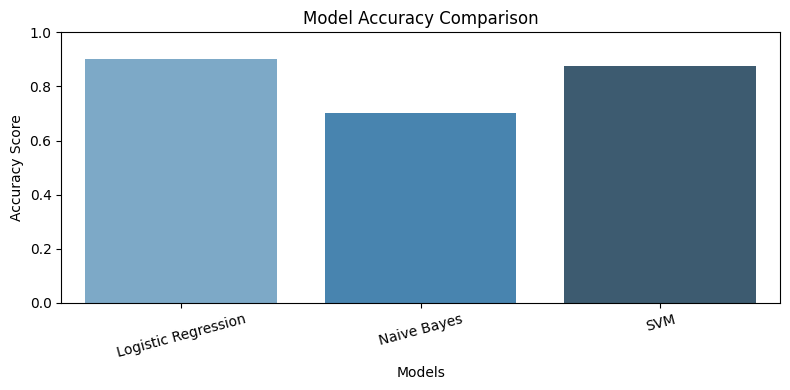

C:\Users\User\AppData\Local\Temp\ipykernel_52528\1049281478.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_results, x='Model', y='F1 Score', palette='Greens_d')


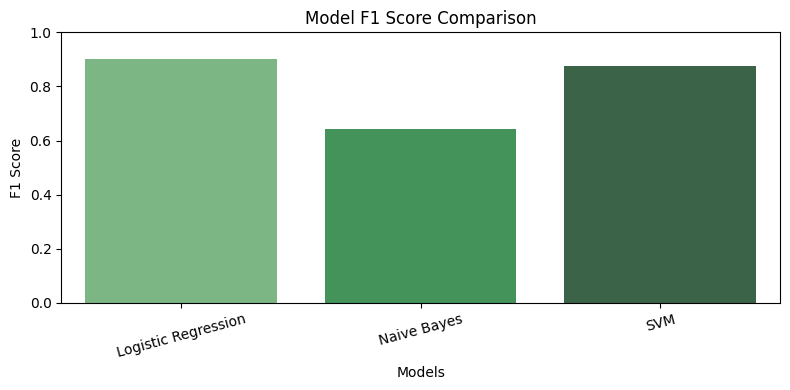

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Accuracy Plot
plt.figure(figsize=(8, 4))
sns.barplot(data=df_results, x='Model', y='Accuracy', palette='Blues_d')
plt.ylim(0, 1)
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy Score')
plt.xlabel('Models')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

# F1 Score Plot
plt.figure(figsize=(8, 4))
sns.barplot(data=df_results, x='Model', y='F1 Score', palette='Greens_d')
plt.ylim(0, 1)
plt.title('Model F1 Score Comparison')
plt.ylabel('F1 Score')
plt.xlabel('Models')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


This plot compares the accuracy and F1 scores of the models. Higher accuracy indicates better classification performance.

In [27]:


#Predict with Untuned Models ---
lr_pred_before = lr.predict(X_test)
nb_pred_before = nb.predict(X_test)
svm_pred_before = svm.predict(X_test)

# After tuning predictions
lr_pred_after = best_lr.predict(X_test)
nb_pred_after = best_nb.predict(X_test)
svm_pred_after = best_svm.predict(X_test)

# Create dictionary with all metrics
comparison_results = {
    'Model': ['Logistic Regression', 'Naive Bayes', 'SVM'],
    'Accuracy (Before)': [
        accuracy_score(y_test, lr_pred_before),
        accuracy_score(y_test, nb_pred_before),
        accuracy_score(y_test, svm_pred_before)
    ],
    'Accuracy (After)': [
        accuracy_score(y_test, lr_pred_after),
        accuracy_score(y_test, nb_pred_after),
        accuracy_score(y_test, svm_pred_after)
    ],
    'F1 Score (Before)': [
        f1_score(y_test, lr_pred_before, average='weighted'),
        f1_score(y_test, nb_pred_before, average='weighted'),
        f1_score(y_test, svm_pred_before, average='weighted')
    ],
    'F1 Score (After)': [
        f1_score(y_test, lr_pred_after, average='weighted'),
        f1_score(y_test, nb_pred_after, average='weighted'),
        f1_score(y_test, svm_pred_after, average='weighted')
    ]
}

# Convert to DataFrame
df_comparison = pd.DataFrame(comparison_results)

# Display nicely
print(df_comparison.to_string(index=False))

# Save to CSV (optional)
df_comparison.to_csv("models/model_comparison_before_after_tuning.csv", index=False)

              Model  Accuracy (Before)  Accuracy (After)  F1 Score (Before)  F1 Score (After)
Logistic Regression           0.894773          0.901528           0.892619          0.900847
        Naive Bayes           0.669277          0.702732           0.561027          0.641555
                SVM           0.877104          0.877104           0.874498          0.874498
